In [1]:
'''
1. make_datapath_list()の動作確認

'''
from voc import make_filepath_list

# 「JPEGImages」「Annotations」の親フォルダーの相対パス
rootpath = "./data/VOCdevkit/VOC2012/"
# ファイルパスのリストを作成
tr_img, tr_anno, \
    val_img, val_anno = make_filepath_list(rootpath)

# 各リストの先頭要素を出力
print(tr_img[0])
print(tr_anno[0])
print(val_img[0])
print(val_anno[0])

./data/VOCdevkit/VOC2012/JPEGImages\2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations\2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages\2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations\2008_000002.xml


In [2]:
'''
2. GetBBoxAndLabelクラスの動作確認

'''
import cv2                       # OpenCV2のインポート
from voc import GetBBoxAndLabel # GetBBoxAndLabelクラス

# VOC2012の正解ラベルのリスト
voc_labels = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train',
    'tvmonitor']

# 正解ラベルを引数にしてGetBBoxAndLabelを生成
annotation = GetBBoxAndLabel(voc_labels)

# 検証データの2番目のイメージを読み込む
index = 1
img_path = val_img[index]
# OpenCV2でイメージのデータ
# (高さのピクセル数, 幅のピクセル数, BGR(3))のndarrayを取得
img = cv2.imread(img_path)
# ndarrayの要素数を数えて、イメージの高さと幅のみを取得
height, width, _ = img.shape

# 2番目のイメージのアノテーションをリストにする
annotation(val_anno[index], # XMLファイルのパス
           width,  # イメージの幅
           height) # イメージの高さ

array([[ 0.09      ,  0.03003003,  0.998     ,  0.996997  , 18.        ],
       [ 0.122     ,  0.56756757,  0.164     ,  0.72672673, 14.        ]])

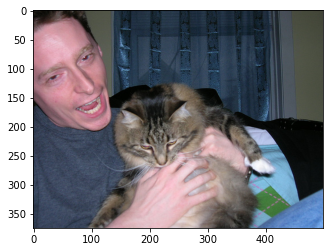

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


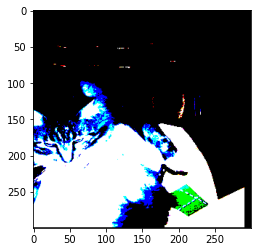

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


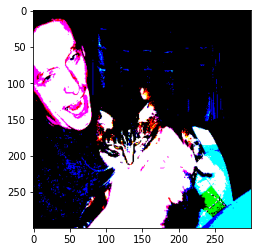

In [3]:
'''
3. DataTransformクラスの動作確認

'''
# OpenCV2のインポート
import cv2
# voc.pyからDataTransformをインポート
from voc import DataTransform
# Matplotlibをインポート
import matplotlib.pyplot as plt
%matplotlib inline

# 動作確認用イメージの高さ,幅,チャネル数を取得
# 19番目のインデックスを指定してイメージのパスを取得
img_filepath = tr_img[19]
# OpenCV2でイメージを[高さ,幅,[G,B,R]]のリストに読み込む
img = cv2.imread(img_filepath)
# 配列要素を数えて、高さ,幅のみを変数に格納
height, width, _ = img.shape

# 正解ラベルを引数にしてGetBBoxAndLabelを生成
gbl = GetBBoxAndLabel(voc_labels)
# 19番目のBBoxの多重リストを取得
# [xmin, ymin, xmax, ymax, 正解ラベルのインデックス], ...]
bbox_label = gbl(tr_anno[19],   # XMLファイル
                 width, height) # 幅、高さ

# オリジナルのイメージを表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# VOCデータセットのRGBの各値の平均値は(R)123, (G)117, (B)104
# これをOpenCVのBGRの並び順に合わせる
color_mean = (104, 117, 123)
input_size = 300  # 画像の入力サイズは300×300
# 前処理オブジェクトを生成
transform = DataTransform(input_size, color_mean)

# 訓練時の拡張処理後のイメージを表示
# 訓練モード
phase = 'train'
# 訓練時の前処理を実施
img_transformed, boxes, labels = transform(
    img,
    phase,             # 訓練モード
    bbox_label[:, :4], # bbox_label[:, :4]はBBoxの座標
    bbox_label[:, 4])  # bbox_label[:, 4]はラベルのインデックス
# 処理後のイメージを出力
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

# 検証時のイメージを表示
# 検証モード
phase = 'val'
# 検証時の前処理を実施
img_transformed, boxes, labels = transform(
    img,
    phase,             # 検証モード
    bbox_label[:, :4], # bbox_label[:, :4]はBBoxの座標
    bbox_label[:, 4])  # bbox_label[:, 4]はラベルのインデックス
# 処理後のイメージを出力
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
'''
4. PreprocessVOC2012クラスの動作確認

'''
# voc.pyからPreprocessVOC2012をインポート
from voc import PreprocessVOC2012

# VOCデータセットのRGBの各値の平均値
# (R)123, (G)117, (B)104
color_mean = (104, 117, 123) # BGRの並び順に
input_size = 300 # 画像のinputサイズを300×300にする

tr_data = PreprocessVOC2012(
    tr_img,        # イメージのパスリスト
    tr_anno,       # アノテーションのパスリスト
    phase="train", # 訓練モード
    transform=DataTransform(input_size, color_mean), # 前処理
    get_bbox_label=GetBBoxAndLabel(voc_labels)) # BBoxとラベル取得

val_data = PreprocessVOC2012(
    val_img,        # イメージのパスリスト
    val_anno,       # アノテーションのパスリスト
    phase="val",    # 検証モード
    transform=DataTransform(input_size, color_mean), # 前処理
    get_bbox_label=GetBBoxAndLabel(voc_labels)) # BBoxとラベル取得

# 検証用のインデックス1のイメージを前処理して出力
batch = val_data.__getitem__(1)
print(len(batch))     # batch(tuple)のサイズ: 2
print(batch[0].shape) # batchの第1要素の形状：[3, 300, 300]
print(batch[1].shape) # batchの第2要素の形状：(2, 5)
print(batch)          # batchを出力

2
torch.Size([3, 300, 300])
(2, 5)
(tensor([[[   0.9417,    6.1650,   11.1283,  ...,  -22.9083,  -13.2200,
            -9.4033],
         [   6.4367,    9.6600,   13.8283,  ...,  -21.4433,  -18.6500,
           -18.2033],
         [  10.8833,   13.5500,   16.7000,  ...,  -20.9917,  -24.5250,
           -25.1917],
         ...,
         [ -23.9500,  -14.9000,   -1.7583,  ..., -108.6083, -111.0000,
          -117.8083],
         [ -28.2817,  -20.1750,   -5.5633,  ..., -104.9933, -111.8350,
          -119.0000],
         [ -20.4767,  -21.0000,  -12.6333,  ..., -107.1683, -115.7800,
          -117.1100]],

        [[  25.9417,   30.1650,   35.1283,  ...,  -18.0767,  -14.7250,
           -11.8533],
         [  31.4367,   33.6600,   37.8283,  ...,  -13.5017,  -10.8250,
           -10.3783],
         [  35.7917,   37.5500,   40.7000,  ...,  -11.8417,  -13.0750,
           -14.0167],
         ...,
         [  -1.9500,    7.1000,   20.2417,  ..., -101.9083, -102.0000,
          -109.7167],
    

In [6]:
'''
5. データーローダーでミニバッチを生成

'''
import torch.utils.data as data
# voc.pyからmultiobject_collate_fnをインポート
from voc import multiobject_collate_fn

batch_size = 4 # ミニバッチのサイズ

''' torch.utils.data.DataLoader(
        dataset, batch_size=1, shuffle=False, sampler=None,
        batch_sampler=None, num_workers=0, collate_fn=None,
        pin_memory=False, drop_last=False, timeout=0,
        worker_init_fn=None, prefetch_factor=2,
        persistent_workers=False)
'''
tr_batch = data.DataLoader(
    tr_data,               # 訓練用イメージのファイルパスリスト
    batch_size=batch_size, # ミニバッチのサイズ
    shuffle=True,          # シャッフルして抽出
    collate_fn=multiobject_collate_fn) # ミニバッチ生成関数

val_batch = data.DataLoader(
    val_data,              # 検証用イメージのファイルパスリスト
    batch_size=batch_size, # ミニバッチのサイズ
    shuffle=False,        # 抽出時はシャッフルしない
    collate_fn=multiobject_collate_fn) # ミニバッチ生成関数

# 'train''val'をキーにして辞書(dict)にまとめる
dataloaders_dict = {'train': tr_batch, 'val': val_batch}

# 動作の確認
print('訓練データのサイズ:', tr_data.__len__()) # 訓練データのサイズ
print('検証データのサイズ:', val_data.__len__())# 検証データのサイズ
print('訓練データのミニバッチの個数:', len(dataloaders_dict['train']))
print('検証データのミニバッチの個数:', len(dataloaders_dict['val']))

# 訓練用のDataLoaderをイテレーターに変換
batch_iterator = iter(dataloaders_dict['train'])
# 訓練用の1番目のミニバッチを取り出す
images, targets = next(batch_iterator)
print('ミニバッチのイメージの形状:', images.size()) # (4, 3, 300, 300)
print('ミニバッチのtargetsのサイズ:',len(targets)) # 4
print('targets[1]の形状:', targets[1].size()) # (3, 5)、1は物体数

訓練データのサイズ: 5717
検証データのサイズ: 5823
訓練データのミニバッチの個数: 1430
検証データのミニバッチの個数: 1456
ミニバッチのイメージの形状: torch.Size([4, 3, 300, 300])
ミニバッチのtargetsのサイズ: 4
targets[1]の形状: torch.Size([1, 5])
